In [8]:
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints._base import Endpoint
from nba_api.stats.library.http import NBAStatsHTTP
from nba_api.stats.endpoints import playerdashboardbyteamperformance
from nba_api.stats.endpoints import leaguedashplayerstats
from nba_api.stats.endpoints import teamdashboardbyteamperformance
from nba_api.stats.endpoints import playerdashboardbylastngames
from nba_api.stats.endpoints import playerdashboardbyyearoveryear
from nba_api.stats.endpoints import teamdashboardbylastngames
from nba_api.stats.endpoints import teamplayerdashboard
from nba_api.stats.static import teams
from nba_api.stats.static import players
import pandas as pd
import inspect
import numpy as np
import csv
import sys

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

headers = { 'Host': 'stats.nba.com', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0', 'Accept': 'application/json, text/plain, /', 'Accept-Language': 'en-US,en;q=0.5', 'Referer': 'https://stats.nba.com/', 'Accept-Encoding': 'gzip, deflate, br', 'Connection': 'keep-alive', }

In [3]:
#Player Input

player1_input = input('Enter player 1: ')
print(player1_input)

player1 = players.find_players_by_full_name(player1_input)[0]['id']
player1_name = players.find_players_by_full_name(player1_input)[0]['full_name']

player_info = playerdashboardbylastngames.PlayerDashboardByLastNGames(player_id=player1, 
                                                                      season='2018-19', headers=headers)

# player_headers = player_info.by_year_player_dashboard.get_dict().get('headers')
# player_data = player_info.overall_player_dashboard.get_dict().get('data')[0]

# #last 20 games
player_headers = player_info.last20_player_dashboard.get_dict().get('headers')
player_data = player_info.last20_player_dashboard.get_dict().get('data')[0]

print(player_headers[5], player_data[5], 
	player_headers[2], player_data[2], 
	player_headers[26], player_data[26],
	player_headers[27], player_data[27])

Enter player 1: bradley beal
bradley beal
W_PCT 0.35 GP 20 PTS 500 PLUS_MINUS 16


In [9]:
#Team Input

team1_input = input('Enter team 1: ')
print(team1_input)
team1 = teams.find_teams_by_full_name(team1_input)[0]['id']

teamdashboard = teamdashboardbylastngames.TeamDashboardByLastNGames(team_id=team1, season='2018-19', last_n_games=1, 
                                                                   headers=headers)
teamdashboard_adv = teamdashboardbylastngames.TeamDashboardByLastNGames(team_id=team1, season='2018-19', 
                                                                    measure_type_detailed_defense='Advanced', 
                                                                        last_n_games=1, headers=headers)

##last n games
team_headers_basic = teamdashboard.overall_team_dashboard.get_dict().get('headers')
team_data_basic = teamdashboard.overall_team_dashboard.get_dict().get('data')[0]
team_headers = teamdashboard_adv.overall_team_dashboard.get_dict().get('headers')
team_data = teamdashboard_adv.overall_team_dashboard.get_dict().get('data')[0]

print(team1, team_headers, team_data)
# print(team1, team_headers[23], team_data[23], team_headers[8], team_data[8], team_headers[10], team_data[10], 
#       team_headers[2], team_data[2], team_headers[3], team_data[3], 
#       team_headers[4], team_data[4], team_headers[21], team_data[21], team_headers[6], team_data[6])

Enter team 1: wizards
wizards
1610612764 ['GROUP_SET', 'GROUP_VALUE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK', 'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'CFID', 'CFPARAMS'] ['Overall', '2018-19', 1, 0, 1, 0.0, 48.0, 102.9, 104.8, 113.6, 111.5, -10.7, -6.8, 0.683, 1.87, 18.7, 0.316, 0.78, 0.552, 0.143, 0.495, 0.524, 104.5, 104.5, 87.08, 105, 0.478, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 163, '2018-19']


In [96]:
roster1 = teamplayerdashboard.TeamPlayerDashboard(team_id=team1, last_n_games=1, 
                                                  season='2019-20', headers=headers).get_dict()
roster2 = teamplayerdashboard.TeamPlayerDashboard(team_id=team2, last_n_games=1, 
                                                  season='2019-20', headers=headers).get_dict()

team1_roster_lastn = []
team1_roster_id = []
team2_roster_lastn = []
team2_roster_id = []

for n in roster1['resultSets'][1]['rowSet']:
    print(n[2], 'GP:', n[3], 'id:', n[1], 'Min', n[7])
    team1_roster_lastn.append(n[2])
    team1_roster_id.append(n[1])

for n in roster2['resultSets'][1]['rowSet']:
    print(n[2], 'GP:', n[3], 'id:', n[1], 'Min', n[7])
    team2_roster_lastn.append(n[2])
    team2_roster_id.append(n[1])
    
print(team1_roster_lastn, '\n',
     team2_roster_lastn)

1627936
Alex Caruso GP: 1 id: 1627936 Min 25.066666666666666
Anthony Davis GP: 1 id: 203076 Min 37.17333333333333
Danny Green GP: 1 id: 201980 Min 20.516666666666666
Dwight Howard GP: 1 id: 2730 Min 23.476666666666667
JaVale McGee GP: 1 id: 201580 Min 12.966666666666667
Kentavious Caldwell-Pope GP: 1 id: 203484 Min 28.816666666666666
Kyle Kuzma GP: 1 id: 1628398 Min 24.338333333333335
LeBron James GP: 1 id: 2544 Min 37.583333333333336
Rajon Rondo GP: 1 id: 200765 Min 18.911666666666665
Troy Daniels GP: 1 id: 203584 Min 11.15
Brandon Ingram GP: 1 id: 1627742 Min 40.15
E'Twaun Moore GP: 1 id: 202734 Min 12.866666666666667
Frank Jackson GP: 1 id: 1628402 Min 7.533333333333333
JJ Redick GP: 1 id: 200755 Min 35.13333333333333
Jahlil Okafor GP: 1 id: 1626143 Min 15.05
Jaxson Hayes GP: 1 id: 1629637 Min 21.283333333333335
Josh Hart GP: 1 id: 1628404 Min 25.45
Jrue Holiday GP: 1 id: 201950 Min 40.46666666666667
Kenrich Williams GP: 1 id: 1629026 Min 33.06666666666667
Nicolo Melli GP: 1 id: 162

In [112]:
def off_per_calculator(player, player_id, team):
    
    PER_MP = 0
    agg_aPERmin = 0
    agg_min = 0
    
    for n in player_id:    
        p_info = playerdashboardbylastngames.PlayerDashboardByLastNGames(player_id=n, season='2019-20',
                                                                        last_n_games=5, headers=headers)
        if players.find_player_by_id(n):
            p_name = players.find_player_by_id(player_id=n)['full_name']
        player_headers = p_info.overall_player_dashboard.get_dict().get('headers')
        player_data = p_info.overall_player_dashboard.get_dict().get('data')[0]
 
    #####PER player stats####
        MP = player_data[6]
        ThrP = player_data[10] 
        AST = player_data[19]
        TOV = player_data[20]
        FGA = player_data[8]
        FG = player_data[7] + player_data[10] 
        FTA = player_data[14]
        FT = player_data[13]
        TRB = player_data[18]
        ORB = player_data[16]
        STL = player_data[21]
        BLK = player_data[22]
        PF = player_data[24]

    ###PER league stats (2018-19)###
        lg_AST = 24.6
        lg_FG = 41.1
        lg_PTS = 111.2
        lg_FGA = 89.2
        lg_FT = 17.7
        lg_FTA = 23.1
        lg_TRB = 45.2
        lg_ORB = 10.3
        lg_TOV = 14.1
        lg_PF = 20.9
        lg_pace = 100
        
    ###PER team stats###
        team_AST = team_data_basic[19]
        team_FG = team_data_basic[7]+team_data_basic[10]
        team_pace = team_data[23] 
       
        factor = (2/3) - (0.5*(lg_AST/lg_FG)) / (2*(lg_FG/lg_FT)) 
        VOP = lg_PTS / (lg_FGA-lg_ORB+lg_TOV+0.44*lg_FTA) 
        DRB_perc = (lg_TRB -lg_ORB) / lg_TRB

    ####PER Calculation####                    
        PER_calc_player = (1 / MP) * ( ThrP + (2/3) * AST 
                                      + (2 - factor * (team_AST / team_FG)) * FG 
                                      + (FT *0.5 * (1 + (1 - (team_AST / team_FG)) + (2/3) * (team_AST / team_FG)))
                                      - VOP * TOV - VOP * DRB_perc * (FGA - FG)
                                      - VOP * 0.44 * (0.44 + (0.56 * DRB_perc)) * (FTA - FT)
                                      + VOP * (1 - DRB_perc) * (TRB - ORB) + VOP * DRB_perc * ORB 
                                      + VOP * STL + VOP * DRB_perc * BLK - PF 
                                      * ((lg_FT / lg_PF) - 0.44 * (lg_FTA / lg_PF) * VOP) )

        adj_PER_calc_player = PER_calc_player * (lg_pace /team_pace) *54
        aPER_min = adj_PER_calc_player * MP
        agg_aPERmin += aPER_min
        agg_min += MP
        
        print(p_name, n, 'Min', MP, 'adj_PER_calc_player', 
              adj_PER_calc_player, 'aPER_min', aPER_min)

    print('agg_aPERmin', agg_aPERmin, 'avg_aPER_min', agg_aPERmin/agg_min, '\n')
#     print('team ast', team_AST, 'team FG', team_FG, 'team_pace', team_pace)
#    print('league stats:', factor, VOP, DRB_perc)

In [113]:
off_per_calculator(team1_roster_lastn, team1_roster_id, team1)
off_per_calculator(team2_roster_lastn, team2_roster_id, team2)

Alex Caruso 1627936 Min 75.31666666666666 adj_PER_calc_player 12.82448949819505 aPER_min 965.8978007057237
Anthony Davis 203076 Min 176.82666666666665 adj_PER_calc_player 45.726961971458934 aPER_min 8085.746262206511
Danny Green 201980 Min 125.11666666666666 adj_PER_calc_player 18.736783797017072 aPER_min 2344.283932736786
Dwight Howard 2730 Min 95.90166666666667 adj_PER_calc_player 17.29078564825628 aPER_min 1658.2151616438575
JaVale McGee 201580 Min 89.06 adj_PER_calc_player 19.567699100117313 aPER_min 1742.699281856448
Kentavious Caldwell-Pope 203484 Min 151.21666666666667 adj_PER_calc_player 28.12536951110669 aPER_min 4253.0246262378505
Kyle Kuzma 1628398 Min 109.19 adj_PER_calc_player 20.2109126565342 aPER_min 2206.8295529669695
LeBron James 2544 Min 184.3 adj_PER_calc_player 35.094719888535685 aPER_min 6467.956875457127
Rajon Rondo 200765 Min 114.71166666666667 adj_PER_calc_player 23.582716989482044 aPER_min 2705.2127703918013
Troy Daniels 203584 Min 43.78333333333333 adj_PER_cal

In [115]:
#Off and Def Rating

def off_def_per_calc(team):
    
    player_info_off = leaguedashplayerstats.LeagueDashPlayerStats(last_n_games=5, season='2019-20', 
                                                                  measure_type_detailed_defense='Advanced')

    player_off_headers = player_info_off.league_dash_player_stats.get_dict().get('headers')
    player_off_data = player_info_off.league_dash_player_stats.get_dict().get('data')

#     print('headers:', player_off_headers)

    for p in team:
        for n in player_off_data:
            if p in n:
                print(n[1], '\n', 'Min', n[9], 
                      'E_Off_Rating', n[10], 'E_Def_Rating', n[13])

In [116]:
off_def_per_calc(team1_roster_lastn)
print('\n')
off_def_per_calc(team2_roster_lastn)

Alex Caruso 
 Min 18.8 E_Off_Rating 115.0 E_Def_Rating 99.8
Anthony Davis 
 Min 35.4 E_Off_Rating 114.8 E_Def_Rating 111.2
Danny Green 
 Min 25.0 E_Off_Rating 116.8 E_Def_Rating 110.7
Dwight Howard 
 Min 19.2 E_Off_Rating 111.4 E_Def_Rating 108.0
JaVale McGee 
 Min 17.8 E_Off_Rating 117.4 E_Def_Rating 112.8
Kentavious Caldwell-Pope 
 Min 30.2 E_Off_Rating 116.8 E_Def_Rating 114.2
Kyle Kuzma 
 Min 21.8 E_Off_Rating 112.5 E_Def_Rating 102.2
LeBron James 
 Min 36.9 E_Off_Rating 110.1 E_Def_Rating 101.6
Rajon Rondo 
 Min 22.9 E_Off_Rating 110.0 E_Def_Rating 104.3
Troy Daniels 
 Min 14.6 E_Off_Rating 119.9 E_Def_Rating 107.7


Brandon Ingram 
 Min 35.8 E_Off_Rating 112.3 E_Def_Rating 110.9
E'Twaun Moore 
 Min 20.0 E_Off_Rating 96.5 E_Def_Rating 115.4
Frank Jackson 
 Min 13.6 E_Off_Rating 84.8 E_Def_Rating 120.8
JJ Redick 
 Min 31.9 E_Off_Rating 118.0 E_Def_Rating 111.5
Jahlil Okafor 
 Min 17.1 E_Off_Rating 103.5 E_Def_Rating 124.3
Jaxson Hayes 
 Min 24.5 E_Off_Rating 118.3 E_Def_Rating 108.

In [117]:
#Alt Player Def Rating

def def_per_calc(team_roster):
    agg_def_rating = 0
    agg_min = 0
    player_info_def = leaguedashplayerstats.LeagueDashPlayerStats(last_n_games=5, season='2019-20', 
                                                                      measure_type_detailed_defense='Defense')

    player_def_headers = player_info_def.league_dash_player_stats.get_dict().get('headers')
    player_def_data = player_info_def.league_dash_player_stats.get_dict().get('data')

#     print('headers:', player_def_headers)
        #print('data:', player_def_data)

    for p in team_roster:
        for n in player_def_data:
            if p in n:
                print(n[1], '\n', 'Def Rating', n[10], 'Min', n[9])
                agg_def_rating += (n[10]*n[9])
                agg_min += n[9]

    
    avg_def_rating = agg_def_rating/len(team_roster)
    avg_def_rating_min = agg_def_rating/agg_min

    print('avg_def_rating', avg_def_rating, 'agg_min', agg_min) 
    print('avg_def_rating_min', avg_def_rating_min, '\n')

In [118]:
def_per_calc(team1_roster_lastn)
def_per_calc(team2_roster_lastn)

Alex Caruso 
 Def Rating 101.3 Min 75.31666666666666
Anthony Davis 
 Def Rating 114.7 Min 176.82666666666665
Danny Green 
 Def Rating 115.5 Min 125.11666666666666
Dwight Howard 
 Def Rating 111.3 Min 95.90166666666667
JaVale McGee 
 Def Rating 117.0 Min 89.06
Kentavious Caldwell-Pope 
 Def Rating 118.3 Min 151.21666666666667
Kyle Kuzma 
 Def Rating 106.8 Min 109.19
LeBron James 
 Def Rating 104.7 Min 184.3
Rajon Rondo 
 Def Rating 104.6 Min 114.71166666666667
Troy Daniels 
 Def Rating 107.9 Min 43.78333333333333
avg_def_rating 12902.614316666666 agg_min 1165.4233333333332
avg_def_rating_min 110.71182417261826 

Brandon Ingram 
 Def Rating 112.7 Min 179.05
E'Twaun Moore 
 Def Rating 115.4 Min 100.12666666666667
Frank Jackson 
 Def Rating 121.7 Min 67.75
JJ Redick 
 Def Rating 113.3 Min 159.5
Jahlil Okafor 
 Def Rating 124.0 Min 34.233333333333334
Jaxson Hayes 
 Def Rating 107.7 Min 122.59
Josh Hart 
 Def Rating 136.5 Min 25.45
Jrue Holiday 
 Def Rating 114.2 Min 183.71666666666667
Kenri

In [ ]:
data = pd.read_csv("NBA Merged Sheets - Sheet2.csv") 
data_t = pd.read_csv("team_stats_basic_2018-19.csv")
df = pd.read_csv("team 2018-19.csv") 

teams = ['ATL', 'IND', 'MIL', 'ORL', 'PHI', 'SAS', 'POR', 'NOP', 'UTA', 'HOU', 'BOS', 
         'MEM', 'BKN', 'MIA', 'CHI', 'MIN', 'PHX', 'DET', 'NYK', 'LAL', 'CHA', 'TOR', 
         'WAS', 'SAC', 'LAC', 'OKC', 'CLE', 'DAL', 'DEN', 'GSW']

In [ ]:
def regression(team):
    
    with open('regression_list.csv', 'a', newline='') as csvFile:
        writer = csv.writer(csvFile)
        headers = ['Team1','T1_OR5', 'T1_DR5', 'Team2', 'T2_OR5', 'T2_DR5', 'Spread', 'TScore']
        writer.writerow(headers)
    csvFile.close() 
    
    team2 = []
    date = []

    score = []

    df2 = df[['Team', 'Matchup', 'Date', 'OffRtg', 'DefRtg', 'ASTRatio', 'PACE']]
    df2 = df[df['Team'] == team1]

    opp = []

    team2 = df2['Matchup']

    for row in team2:
        opp.append(row.replace(team1+'vs.', '').replace(team1+'@', ''))

    df2['Opp'] = opp

    team1_off_avg = 0
    team1_def_avg = 0

    team2_off_avg = 0
    team2_def_avg = 0
    totalscore = 0

    for index, row in df2.head(n=77).iterrows(): 
        whole_row = []
        team2 = row['Opp']
        date = row['Date']
        df3 = df[df['Team'] == team2]

        score = data.loc[(data['DATE']==date) & (data['TEAM']==team1)]
        score = score.iloc[0]
        score = (score["team_pts"], score['team_plus_minus'])
        print('===', row['Team'], row['OffRtg'], row['DefRtg'], 
              row['Date'], row['Opp'], score, "===") 
                
        print(row['Team'], 'Last5_Off', row['Last5_Off'], 'Last5_Def', row['Last5_Def'])
        whole_row.append(row['Team'])
        whole_row.append(row['Last5_Off'])
        whole_row.append(row['Last5_Def'])

        df3 = df3.loc[df3['Date'] == date]
        for index, row in df3.iterrows():
            print(row['Team'], 'Last5_Off', row['Last5_Off'], 'Last5_Def', row['Last5_Def'], '\n')
            whole_row.append(row['Team'])
            whole_row.append(row['Last5_Off'])
            whole_row.append(row['Last5_Def'])
            whole_row.append(score[1])
            whole_row.append(score[0]-score[1]+score[0])
            
            with open('regression_list.csv', 'a') as csvFile:
                writer = csv.writer(csvFile)
                writer.writerow(whole_row)
            csvFile.close() 

In [ ]:
for team in teams:
    regression(team)

In [4]:
rdf = pd.read_csv("regression_list.csv") 
rdf

,Team1,T1_OR5,T1_DR5,Team2,T2_OR5,T2_DR5,Spread,TScore
0,ATL,110.22,117.62,IND,108.68,110.44,-1.0,269.0
1,ATL,110.00,119.68,MIL,118.16,113.78,-8.0,222.0
2,ATL,112.46,113.90,ORL,111.90,113.60,-36.0,262.0
3,ATL,110.68,113.52,PHI,110.46,114.72,8.0,252.0
4,ATL,111.00,112.52,SAS,113.02,111.18,-6.0,228.0
5,ATL,108.94,113.40,MIL,114.66,101.26,1.0,271.0
6,ATL,106.50,109.10,POR,121.96,112.64,-20.0,216.0
7,ATL,106.36,112.62,NOP,103.12,114.46,10.0,250.0
8,ATL,109.04,111.30,PHI,117.32,111.14,2.0,256.0
9,ATL,111.58,112.10,UTA,120.08,101.46,3.0,231.0


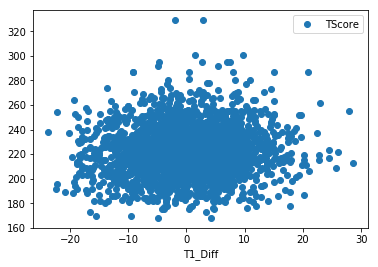

In [7]:
rdf = pd.read_csv("regression_list.csv") 

rdf['T1_Diff'] = rdf.T1_OR5 - rdf.T1_DR5
rdf['T2_Diff'] = rdf.T2_OR5 - rdf.T2_DR5

rdf.T1_OR5 = pd.to_numeric(rdf.T1_OR5)
rdf.T1_DR5 = pd.to_numeric(rdf.T1_DR5)
rdf.T2_OR5 = pd.to_numeric(rdf.T2_OR5)
rdf.T2_DR5 = pd.to_numeric(rdf.T2_DR5)
rdf.T1_Diff = pd.to_numeric(rdf.T1_Diff)

# rdf.plot(x='T1_Diff', y='TScore', style='o')  
# plt.show()
# rdf.plot(x='T2_Diff', y='Spread', style='o')  
# plt.show()

In [9]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

X = rdf[['T1_OR5','T1_DR5', 'T2_OR5', 'T2_DR5']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = rdf['Spread']
Y2 = rdf['TScore']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

regr2 = linear_model.LinearRegression()
regr2.fit(X, Y2)

print('Intecept_Score: \n', regr2.intercept_)
print('Coefficients_Score: \n', regr2.coef_)


Intercept: 
 0.1968372047350489
Coefficients: 
 [ 0.42950031 -0.40077189 -0.43303045  0.40262237]
Intecept_Score: 
 96.94754180172698
Coefficients_Score: 
 [0.42136938 0.15357508 0.41373199 0.15386099]


/Users/stan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [94]:
team1_input = input('Enter team 1: ')

print(team1_input)

team1 = teams.find_teams_by_full_name(team1_input)[0]['id']

team1_dashboard_adv = teamdashboardbylastngames.TeamDashboardByLastNGames(team_id=team1, season='2019-20', 
                                                                    measure_type_detailed_defense='Advanced', 
                                                                        last_n_games=5, headers=headers)

team1_headers = team1_dashboard_adv.overall_team_dashboard.get_dict().get('headers')
team1_data = team1_dashboard_adv.overall_team_dashboard.get_dict().get('data')[0]

print(team1, '\n', team1_headers[7], team1_data[7], '\n', 
      team1_headers[8], team1_data[8], '\n',
      team1_headers[9], team1_data[9], '\n', 
      team1_headers[10], team1_data[10])

E_OFF1_RATING = team1_data[7]
OFF1_RATING = team1_data[8]
E_DEF1_RATING = team1_data[9]
DEF1_RATING = team1_data[10]

Enter team 1: lakers
lakers
1610612747 
 E_OFF_RATING 114.0 
 OFF_RATING 116.5 
 E_DEF_RATING 108.1 
 DEF_RATING 112.6


In [95]:
team2_input = input('Enter team 2: ')
print(team2_input)

team2 = teams.find_teams_by_full_name(team2_input)[0]['id']

team2_dashboard_adv = teamdashboardbylastngames.TeamDashboardByLastNGames(team_id=team2, season='2019-20', 
                                                                    measure_type_detailed_defense='Advanced', 
                                                                        last_n_games=5, headers=headers)

team2_headers = team2_dashboard_adv.overall_team_dashboard.get_dict().get('headers')
team2_data = team2_dashboard_adv.overall_team_dashboard.get_dict().get('data')[0]

print(team2, '\n', team2_headers[7], team2_data[7], '\n', 
      team2_headers[8], team2_data[8], '\n',
      team2_headers[9], team2_data[9], '\n', 
      team2_headers[10], team2_data[10])

E_OFF2_RATING = team2_data[7]
OFF2_RATING = team2_data[8]
E_DEF2_RATING = team2_data[9]
DEF2_RATING = team2_data[10]

Enter team 2: pelicans
pelicans
1610612740 
 E_OFF_RATING 109.9 
 OFF_RATING 111.2 
 E_DEF_RATING 114.3 
 DEF_RATING 116.7


In [45]:
# prediction with sklearn
#https://stats.nba.com/team/1610612763/advanced/?Season=2019-20&SeasonType=Regular%20Season&Split=lastn

New_T1_OR5 = E_OFF1_RATING
New_T1_DR5 = E_DEF1_RATING

New_T2_OR5 = E_OFF2_RATING
New_T2_DR5 = E_DEF2_RATING

print('Predicted Spread: \n', regr.predict([[New_T1_OR5 ,New_T1_DR5, New_T2_OR5, New_T2_OR5 ]]))
print('Predicted Over/Under: \n', regr2.predict([[New_T1_OR5 ,New_T1_DR5, New_T2_OR5, New_T2_OR5 ]])) 

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Predicted Spread: 
 [3.73575207]
Predicted Over/Under: 
 [222.66320855]
                            OLS Regression Results                            
Dep. Variable:                 Spread   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     64.67
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           6.76e-52
Time:                        00:35:54   Log-Likelihood:                -9365.1
No. Observations:                2310   AIC:                         1.874e+04
Df Residuals:                    2305   BIC:                         1.877e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [ ]:
#Theory: If second game of back-to-back is a road game, odds of winning decrease 7-8%, multiply ratings by 0.93.